# Mengimpor pustaka yang diperlukan:

In [ ]:
# Langkah 1: Mengimpor pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import joblib
import matplotlib.pyplot as plt

Mengimpor pustaka untuk manipulasi data (pandas), pemodelan dan evaluasi (scikit-learn), penyimpanan model (joblib), dan visualisasi data (matplotlib).

# Membuat dataset:

In [ ]:
# Langkah 2: Membuat dataset
# Membuat data gejala diabetes dan tipe diabetes dalam bentuk dictionary
data = {
    'frekuensi_buang_air_kecil': [1, 1, 0, 0, 1, 0],
    'rasa_haus': [1, 1, 0, 0, 1, 0],
    'kulit_mulut_kering': [1, 0, 0, 0, 1, 0],
    'penurunan_berat_badan': [1, 1, 0, 1, 0, 0],
    'kelelahan': [1, 1, 1, 0, 1, 0],
    'penglihatan_buram': [1, 0, 1, 0, 0, 0],
    'gatal_alat_kelamin': [0, 0, 1, 0, 1, 0],
    'penyembuhan_luka_lambat': [0, 0, 1, 0, 1, 0],
    'mata_kering': [0, 0, 1, 0, 1, 0],
    'kelaparan': [1, 0, 1, 0, 1, 0],
    'kulit_bermasalah': [0, 1, 0, 1, 0, 1],
    'infeksi_jamur': [1, 0, 1, 0, 1, 0],
    'iritasi_genital': [0, 1, 0, 1, 0, 1],
    'mudah_tersinggung': [1, 0, 1, 0, 1, 0],
    'kesemutan': [0, 1, 0, 1, 0, 1],
    'tipe_diabetes': [1, 1, 2, 0, 2, 0]
}

# Membuat DataFrame dari data gejala dan tipe diabetes
df = pd.DataFrame(data)

Membuat data gejala diabetes dan tipe diabetes dalam bentuk dictionary dan mengonversinya menjadi DataFrame df.

# Melatih model dengan cross-validation:

In [ ]:
#Langkah 3: Melatih model dengan cross-validation
# Memisahkan fitur (X) dan label (y) dari DataFrame
X = df.drop(columns=['tipe_diabetes'])
y = df['tipe_diabetes']

# Membuat objek DecisionTreeClassifier
model = DecisionTreeClassifier()

# Melakukan cross-validation dengan 2-fold dan menyimpan skor cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=2)

# Menampilkan skor cross-validation dan nilai rata-ratanya
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Mean cross-validation score: {cross_val_scores.mean():.2f}')

# Melatih model pada seluruh dataset
model.fit(X, y)


Cross-validation scores: [0.33333333 0.33333333]
Mean cross-validation score: 0.33


DecisionTreeClassifier()

Memisahkan fitur (X) dan label (y), membuat model Decision Tree, melakukan cross-validation dengan 2 fold, menampilkan skor cross-validation dan nilai rata-ratanya, melatih model pada seluruh dataset, dan menyimpan model yang telah dilatih ke file 'diabetes_model.pkl'.

In [ ]:
# Menyimpan model yang telah dilatih ke file 'diabetes_model.pkl'
joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']

# Memuat model:

In [ ]:
# Langkah 4: Memuat model
# Memuat model dari file 'diabetes_model.pkl'
model = joblib.load('diabetes_model.pkl')

Memuat model dari file 'diabetes_model.pkl'.

# Membuat fungsi untuk input dinamis dan melakukan prediksi:

In [ ]:
# Langkah 5: Membuat fungsi untuk input dinamis dan melakukan prediksi
def prediksi_diabetes():
    # Mengambil input dari pengguna untuk setiap gejala
    gejala = {
        'frekuensi_buang_air_kecil': int(input("Frekuensi buang air kecil sering(0 atau 1): ")),
        'rasa_haus': int(input("Sering merasa haus berlebihan (0 atau 1): ")),
        'kulit_mulut_kering': int(input("Kulit dan mulut kering (0 atau 1): ")),
        'penurunan_berat_badan': int(input("Penurunan berat badan drastis (0 atau 1): ")),
        'kelelahan': int(input("sering merasa kelelahan (0 atau 1): ")),
        'penglihatan_buram': int(input("Penglihatan buram (0 atau 1): ")),
        'gatal_alat_kelamin': int(input("Gatal di sekitar alat kelamin (0 atau 1): ")),
        'penyembuhan_luka_lambat': int(input("Penyembuhan luka yang lambat (0 atau 1): ")),
        'mata_kering': int(input("Mata kering (0 atau 1): ")),
        'kelaparan': int(input("Sering Merasa kelaparan (0 atau 1): ")),
        'kulit_bermasalah': int(input("Kulit jadi bermasalah/kusam (0 atau 1): ")),
        'infeksi_jamur': int(input("Infeksi jamur (0 atau 1): ")),
        'iritasi_genital': int(input("Iritasi genital (0 atau 1): ")),
        'mudah_tersinggung': int(input("Keletihan dan mudah tersinggung (0 atau 1): ")),
        'kesemutan': int(input("Kesemutan atau mati rasa (0 atau 1): "))
    }

    # Membuat DataFrame dari gejala yang diinput oleh pengguna
    gejala_df = pd.DataFrame([gejala])

    # Melakukan prediksi menggunakan model yang telah dilatih
    prediksi = model.predict(gejala_df)[0]

    # Menentukan hasil prediksi berdasarkan nilai prediksi
    if prediksi == 1:
        hasil_prediksi = "Diabetes Tipe 1"
    elif prediksi == 2:
        hasil_prediksi = "Diabetes Tipe 2"
    else:
        hasil_prediksi = "Tidak ada diabetes"

    # Menampilkan hasil prediksi
    print(f'Prediksi: {hasil_prediksi}')

# Memanggil fungsi untuk input dinamis dan prediksi
prediksi_diabetes()

Frekuensi buang air kecil sering(0 atau 1): 1
Sering merasa haus berlebihan (0 atau 1): 1
Kulit dan mulut kering (0 atau 1): 0
Penurunan berat badan drastis (0 atau 1): 1
sering merasa kelelahan (0 atau 1): 1
Penglihatan buram (0 atau 1): 0
Gatal di sekitar alat kelamin (0 atau 1): 1
Penyembuhan luka yang lambat (0 atau 1): 1
Mata kering (0 atau 1): 0
Sering Merasa kelaparan (0 atau 1): 1
Kulit jadi bermasalah/kusam (0 atau 1): 1
Infeksi jamur (0 atau 1): 0
Iritasi genital (0 atau 1): 1
Keletihan dan mudah tersinggung (0 atau 1): 1
Kesemutan atau mati rasa (0 atau 1): 1
Prediksi: Diabetes Tipe 1


Membuat fungsi prediksi_diabetes yang meminta input gejala dari pengguna, membuat DataFrame dari input tersebut, melakukan prediksi menggunakan model yang telah dilatih, menentukan hasil prediksi berdasarkan nilai prediksi, dan menampilkan hasil prediksi.

# Menampilkan grafik cross-validation scores:

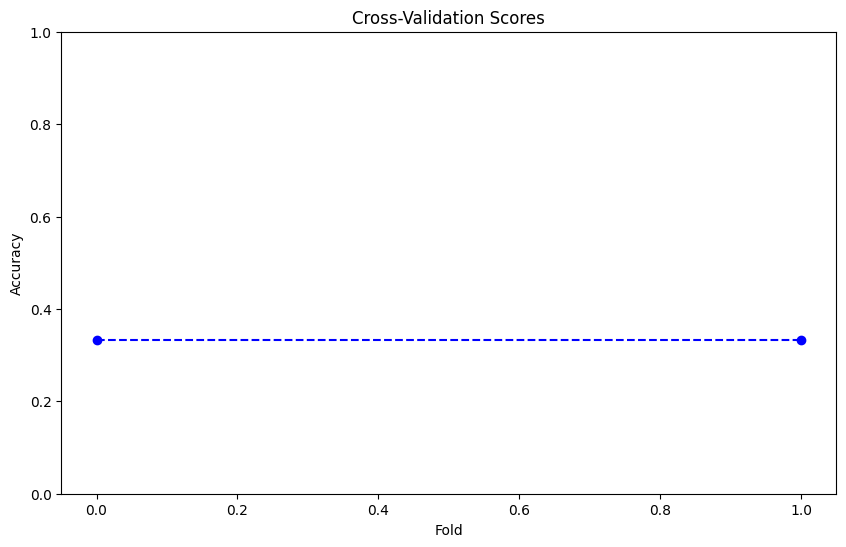

Nilai akurasi rata-rata: 0.33


In [ ]:
# Langkah 6: Menampilkan grafik cross-validation scores
# Membuat grafik untuk menampilkan skor cross-validation
plt.figure(figsize=(10, 6))
plt.plot(cross_val_scores, marker='o', linestyle='--', color='b')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Menampilkan nilai akurasi rata-rata
print(f'Nilai akurasi rata-rata: {cross_val_scores.mean():.2f}')

Membuat grafik untuk menampilkan skor cross-validation, menetapkan judul dan label sumbu, menampilkan grafik, dan menampilkan nilai akurasi rata-rata.